<a href="https://colab.research.google.com/github/alfazick/reflections/blob/master/courserafinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# connect to my local googledrive
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab_Notebooks'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
# install necessary packages
!pip install pytesseract
!sudo apt install tesseract-ocr


     |████████████████████████████████| 174kB 9.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/d5/90/56/ab7b652592da86821293f7cadc1c554aa376a0d57ce414d0a0
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00f

In [0]:
# importing necessary libraries
import zipfile

from PIL import Image
from pytesseract import image_to_string
import cv2 as cv
import numpy as np

face_cascade = cv.CascadeClassifier(root_path + '/haarcascade_frontalface_default.xml')


In [0]:
# create a dictionary with image and detected text

from zipfile import ZipFile
filename = root_path + '/small_img.zip'
images_dict = {}
with ZipFile(filename) as archive:
    for entry in archive.namelist():
        with archive.open(entry) as file:
            img = Image.open(file)
            images_dict[entry] = img 
            imggray = img.convert('L')
            images_dict[entry+'text'] =  image_to_string(imggray)

In [0]:


import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import Image, ImageFont, ImageDraw, ImageEnhance

# 2 main functions


# collect faces from pngfiles and return list_of_images
def collect_faces(original_image):
    # converting image from pillow to cv format
    imcv = cv.cvtColor(np.asarray(original_image), cv.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(imcv,1.5)
    pil_img = original_image.convert('RGB')
    images = []
    for x,y,w,h in faces:
        cropped_face = pil_img.crop((x,y,x+w,y+h))
        images.append(cropped_face)
    return images




# create sheet from list of images
def create_sheet(image_faces):
    height = 10
    width = 150
    contact_sheet=PIL.Image.new('RGB', (width*len(image_faces),height*len(image_faces)))
    x=0
    y=0

    for img in image_faces:
        # Lets paste the current image into the contact sheet
        # create image with size (100,100) and black background
        size = 128, 128
        img.thumbnail(size, Image.ANTIALIAS)
        contact_sheet.paste(img, (x, y) )
                    
        # Now we update our X position. If it is going to be the width of the image, then we set it to 0
        # and update Y as well to point to the next "line" of the contact sheet.
        if x+width == contact_sheet.width:
            x=0
            y=y+height
        else:
            x=x+width

    # resize and display the contact sheet
    contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
    display(contact_sheet)

In [0]:
check_images = collect_faces(images_dict['a-0.png'])

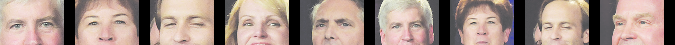

In [57]:
create_sheet(check_images)